In [178]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = 2000
%matplotlib inline

In [179]:
df = pd.read_csv('train.csv')

In [180]:
del df['id']

In [181]:
dummy_df = pd.get_dummies(df)

In [183]:
y = dummy_df['loss'].values
del dummy_df['loss']

In [184]:
from sklearn.metrics.pairwise import cosine_similarity

In [185]:
zscore_df = (dummy_df - dummy_df.mean()) / dummy_df.std()
zscore_df = zscore_df.values

In [186]:
def get_sorted_distances_and_index(data, target):
    distances = cosine_similarity(target, data)[0]
    orders = np.argsort(-distances)
    return distances[orders], orders

In [187]:
def get_estimations(data, target, y, k):
    num_samples = len(data)
    distances, orders = get_sorted_distances_and_index(data, target)
    start, end = 0, k
    estimates = []
    while end < num_samples:
        group_index = orders[start:end]
        group_distances = distances[start:end]
        group_y = y[group_index]
        weights = group_distances / group_distances.sum()
        estimated_y = weights @ group_y
        estimates.append(estimated_y)
        start = end
        end += k
    return estimates
    #return group_index, group_distances, group_y, weights

In [188]:
def get_estimation_errors(data, target, y, target_y, k):
    estimations = get_estimations(data, target, y, k)
    return estimations - target_y

In [207]:
import warnings
warnings.filterwarnings("ignore")

In [216]:
def get_sample_errors(data, y, k=10000):
    errors = []
    for i in range(data.shape[0]):
        if i % 100 == 0:
            print('Estimating training data {0}, {0}/{1}'.format(i, len(y)))
        training_data_index = [j for j in range(len(y)) if j != i]
        errors_ = get_estimation_errors(data[training_data_index], 
                                        data[i], 
                                        y[training_data_index],
                                        y[i],
                                        10000)
        errors.append(errors_)
    return errors

In [ ]:
errors = get_sample_errors(zscore_df, y)

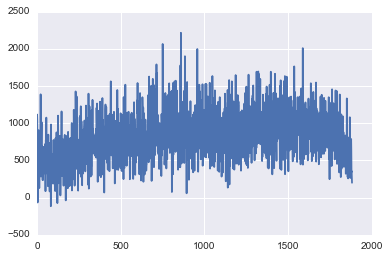

In [170]:
plt.figure()
plt.plot(errors)